# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf

%matplotlib inline

/Users/qingye/opt/miniconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/qingye/opt/miniconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/qingye/opt/miniconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/qingye/opt/miniconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/Users/qingye/opt/miniconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ["dlopen(/Users/qingye/opt/miniconda3/lib/python3.9/site-packages/tensorflow_io/python/

In [2]:
dataset = get_dataset("data/train/*.tfrecord")

Metal device set to: Apple M1 Pro
INFO:tensorflow:Reading unweighted datasets: ['data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2022-10-05 15:47:38.750473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-05 15:47:38.751010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    # color map
    color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    fig, ax = plt.subplots()
    image = batch['image'].numpy()
    ax.imshow(image)
    
    # draw bounding boxes
    for coord, label in zip(batch['groundtruth_boxes'].numpy(), batch['groundtruth_classes'].numpy()):
        xy = (coord[1]*image.shape[1], coord[0]*image.shape[0])
        width = (coord[3] - coord[1])*image.shape[1]
        height = (coord[2] - coord[0])*image.shape[0]
        rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
        ax.add_patch(rec)
    
    plt.axis('off')

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

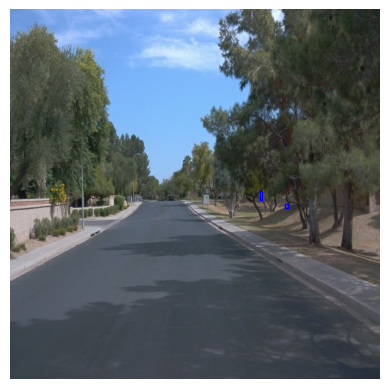

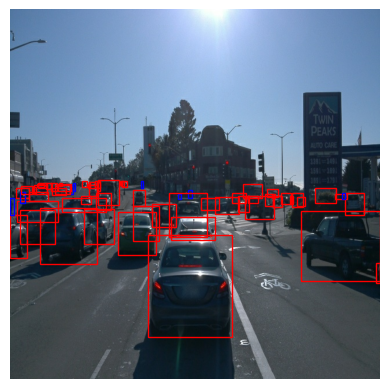

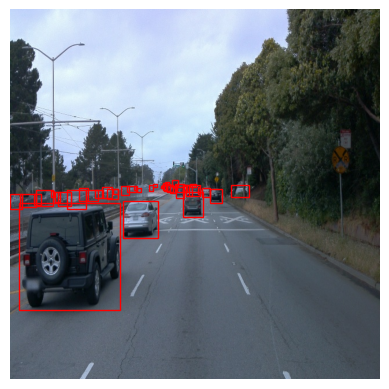

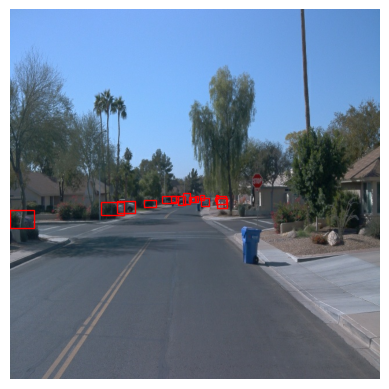

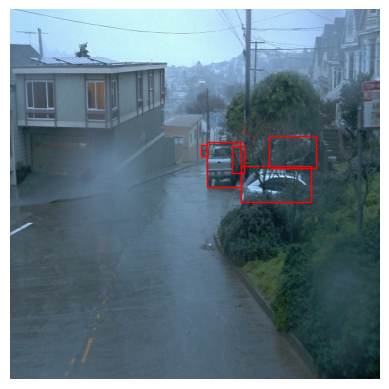

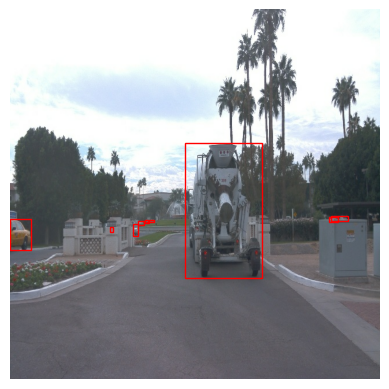

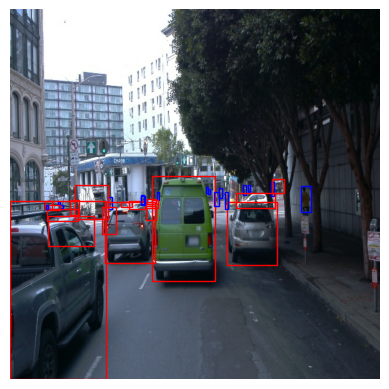

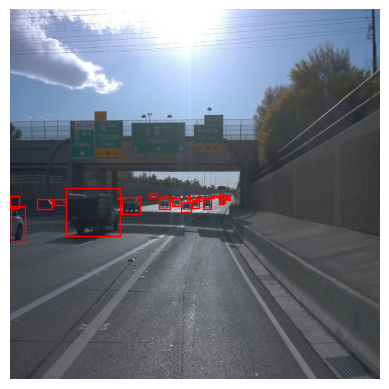

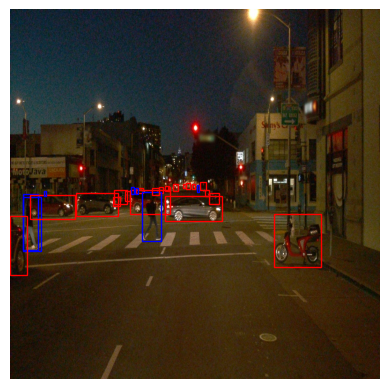

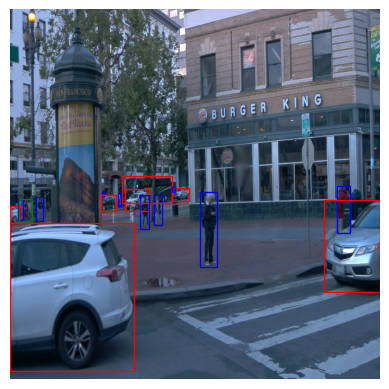

In [6]:
# Display 10 random images in dataset
for i in range(10):
    for batch in dataset.shuffle(buffer_size=100, reshuffle_each_iteration=False).take(1):
        display_images(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [7]:
# check distribution of labels
label_counts = {1: 0, 2: 0, 4: 0}

for batches in dataset.take(10000):
    for l in batches['groundtruth_classes'].numpy():
        label_counts[l] += 1

In [8]:
label_counts

{1: 172848, 2: 47908, 4: 1228}

In [9]:
label_counts_df = pd.DataFrame.from_dict(label_counts, orient='index')
label_counts_df.index = ['cars', 'pedestrians', 'cyclist']

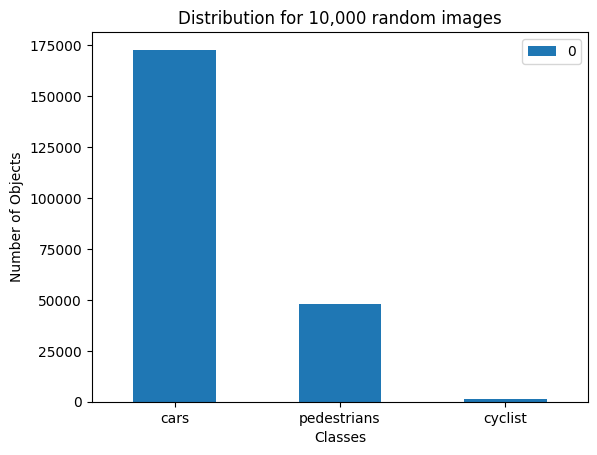

In [10]:
ax = label_counts_df.plot.bar(rot=0)
ax.set(xlabel='Classes', ylabel='Number of Objects', title='Distribution for 10,000 random images');